In [1]:
from types import GeneratorType
import altair as alt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree


In [5]:
denver = pd.read_csv(
    'https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_denver/dwellings_denver.csv')


In [96]:
dwellings_ml = pd.read_csv(
    "https://github.com/byuidatascience/data4dwellings/raw/master/data-raw/dwellings_ml/dwellings_ml.csv")


x = dwellings_ml.filter(["livearea", "basement", "stories", "numbaths"])
y = dwellings_ml[["before1980"]]

dwellings_ml.columns


Index(['parcel', 'abstrprd', 'livearea', 'finbsmnt', 'basement', 'yrbuilt',
       'totunits', 'stories', 'nocars', 'numbdrm', 'numbaths', 'sprice',
       'deduct', 'netprice', 'tasp', 'smonth', 'syear', 'condition_AVG',
       'condition_Excel', 'condition_Fair', 'condition_Good',
       'condition_VGood', 'quality_A', 'quality_B', 'quality_C', 'quality_D',
       'quality_X', 'gartype_Att', 'gartype_Att/Det', 'gartype_CP',
       'gartype_Det', 'gartype_None', 'gartype_att/CP', 'gartype_det/CP',
       'arcstyle_BI-LEVEL', 'arcstyle_CONVERSIONS', 'arcstyle_END UNIT',
       'arcstyle_MIDDLE UNIT', 'arcstyle_ONE AND HALF-STORY',
       'arcstyle_ONE-STORY', 'arcstyle_SPLIT LEVEL', 'arcstyle_THREE-STORY',
       'arcstyle_TRI-LEVEL', 'arcstyle_TRI-LEVEL WITH BASEMENT',
       'arcstyle_TWO AND HALF-STORY', 'arcstyle_TWO-STORY', 'qualified_Q',
       'qualified_U', 'status_I', 'status_V', 'before1980'],
      dtype='object')

In [7]:
sub_dat = denver.sample(500)

alt.Chart(sub_dat).mark_boxplot().encode(
    y = alt.Y("yrbuilt", scale=alt.Scale(zero=False)),
    x = "gartype"
)

alt.Chart(...)

In [8]:
sns.set_style("whitegrid")
data = alt.Chart(sub_dat).encode(sns.boxplot(data=data))


NameError: name 'data' is not defined

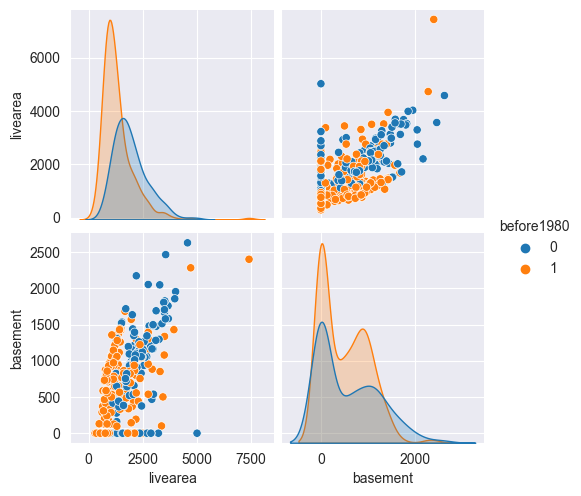

In [97]:
sub_dat1 = dwellings_ml.filter(["livearea", "finsbsmt", "basement",
 "yearbuilt", "before1980"]).sample(500)


sns.set_style("darkgrid") #try "whitegrid", "white", "dark"
sns.pairplot(sub_dat1, hue = "before1980")

<AxesSubplot:>

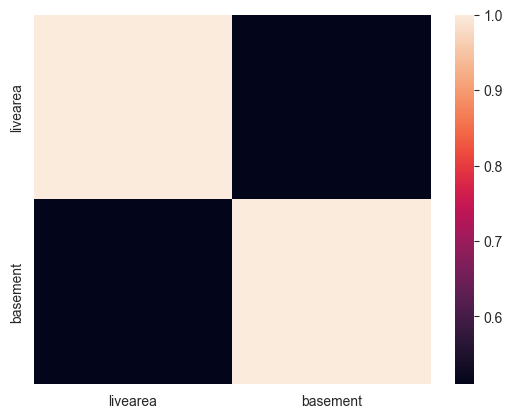

In [10]:
corr = sub_dat1.drop(columns = "before1980").corr()

sns.heatmap(corr)

In [98]:
x = dwellings_ml.filter(["livearea", "finsbsmt", "basement", "numbaths", "yearbuilt", "before1980"]).sample(4000)
y = dwellings_ml.before1980.sample(4000)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 222)

x_test.head()

,livearea,basement,numbaths,before1980
8859,1836,918,4,0
16341,1022,1022,2,1
20078,1148,1142,3,1
9279,779,0,2,0
21566,1780,0,3,1


In [40]:
y_train.head()

5334    1
1521    0
5942    1
2630    0
2569    0
Name: before1980, dtype: int64

In [65]:
#Create the model
classifier = DecisionTreeClassifier()

#Train the model / fit the model
classifier.fit(x_train, y_train)

#make predictions
y_predictions = classifier.predict(x_test)

#test how accurate predictions are
metrics.accuracy_score(y_test, y_predictions)

0.5234210526315789

In [48]:
# Create a decision tree
classifier_DT = DecisionTreeClassifier(max_depth=4)

# Fit the decision tree
classifier_DT.fit(x_train, y_train)

# Test the decision tree (make predictions)
y_predicted_DT = classifier_DT.predict(x_test)

# Evaluate the decision tree
print("Accuracy:", metrics.accuracy_score(y_test, y_predicted_DT))


Accuracy: 0.625


|--- feature_1 <= 999.50
|   |--- feature_1 <= 903.00
|   |   |--- feature_1 <= 875.50
|   |   |   |--- feature_1 <= 872.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  872.50
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  875.50
|   |   |   |--- feature_1 <= 883.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  883.00
|   |   |   |   |--- class: 1
|   |--- feature_1 >  903.00
|   |   |--- feature_1 <= 936.50
|   |   |   |--- feature_0 <= 1918.00
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1918.00
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  936.50
|   |   |   |--- feature_2 <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.50
|   |   |   |   |--- class: 0
|--- feature_1 >  999.50
|   |--- feature_0 <= 1028.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_0 <= 1013.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  1013.00
| 

[Text(0.5089285714285714, 0.9, 'basement <= 999.5\ngini = 0.464\nsamples = 3000\nvalue = [1095, 1905]'),
 Text(0.2857142857142857, 0.7, 'basement <= 903.0\ngini = 0.468\nsamples = 2317\nvalue = [866, 1451]'),
 Text(0.14285714285714285, 0.5, 'basement <= 875.5\ngini = 0.465\nsamples = 2141\nvalue = [786, 1355]'),
 Text(0.07142857142857142, 0.3, 'basement <= 872.5\ngini = 0.466\nsamples = 2106\nvalue = [780, 1326]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.466\nsamples = 2101\nvalue = [775, 1326]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.21428571428571427, 0.3, 'basement <= 883.0\ngini = 0.284\nsamples = 35\nvalue = [6, 29]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(0.25, 0.1, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.42857142857142855, 0.5, 'basement <= 936.5\ngini = 0.496\nsamples = 176\nvalue = [80, 96]'),
 Text(0.35714285714285715, 0.3, 'livearea <= 1918.0\ngini = 0.487\nsamples =

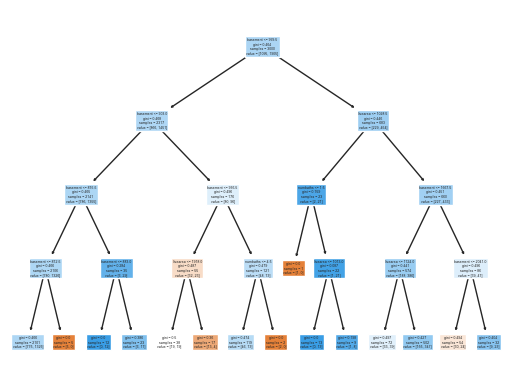

In [49]:
# method 1 - text
print(tree.export_text(classifier_DT))

# method 2 - graph
tree.plot_tree(classifier_DT, feature_names=x.columns, filled=True)


In [50]:
print(sum(y_predictions))
print(y_predictions.shape)

597
(1000,)


Shows the number of predictions and the matrix (shape).

In [43]:
print(metrics.confusion_matrix(y_test, y_predictions))

[[136 220]
 [267 377]]


In [95]:
# a confusion matrix
print(metrics.confusion_matrix(y_test, y_predicted_DT))

# this one might be easier to read
print(pd.crosstab(y_test.before1980, y_predicted_DT, rownames=[
      'True'], colnames=['Predicted'], margins=True))

# visualize a confusion matrix
# requires 'matplotlib' to be installed
metrics.plot_confusion_matrix(classifier_DT, x_test, y_test)


[[ 23 352]
 [ 36 589]]


AttributeError: 'Series' object has no attribute 'before1980'

In [54]:
print(pd.crosstab(y_test, y_predictions, rownames = ['True'], colnames = ['Predicted'], margins = True))

Predicted    0    1   All
True                     
0          136  220   356
1          267  377   644
All        403  597  1000


c:\Users\baldw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


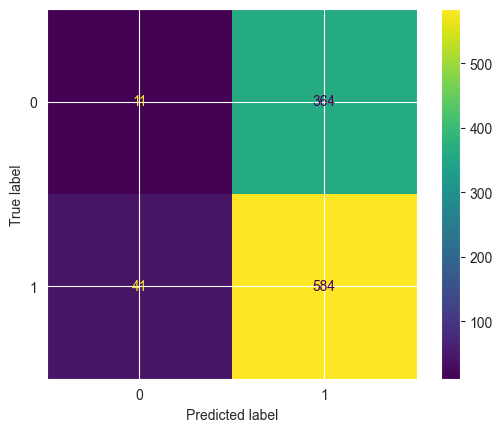

In [93]:
metrics.plot_confusion_matrix(classifier_DT, x_test, y_test)

In [70]:
classifier_DT.feature_importances_

feature_df = pd.DataFrame(
    {'features': x.columns, 'importance': classifier_DT.feature_importances_})
feature_df


,features,importance
0,livearea,0.246385
1,basement,0.648144
2,numbaths,0.105471
3,before1980,0.000000
